#  Q2. Download the CAR DETAILS dataset and perform Data cleaning
## and Data Pre-Processing if Necessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df=pd.read_excel('CAR_DETAILS.xlsx')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First_Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First_Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First_Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First_Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second_Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second_Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second_Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second_Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First_Owner


In [196]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [198]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [199]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [200]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [201]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [202]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark_Dealer'], dtype=object)

In [203]:
df.owner.unique()

array(['First_Owner', 'Second_Owner', 'Fourth_Above_Owner', 'Third_Owner',
       'Test_Drive_Car'], dtype=object)

# Data Preprocessing

# Handling Null Values

In [204]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [205]:
df.duplicated().sum()

763

# Separate continous and categorical features

In [206]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


# Exploring and cleaning categorical features

In [207]:
for i in cat_cols:
    print(f'Feature:{i}, | Count of Unique: {df[i].nunique()}')
    print(f'value_counts{df[i].unique()}')
    print('*'*50)

Feature:name, | Count of Unique: 1491
value_counts['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
**************************************************
Feature:fuel, | Count of Unique: 5
value_counts['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
**************************************************
Feature:seller_type, | Count of Unique: 3
value_counts['Individual' 'Dealer' 'Trustmark_Dealer']
**************************************************
Feature:transmission, | Count of Unique: 2
value_counts['Manual' 'Automatic']
**************************************************
Feature:owner, | Count of Unique: 5
value_counts['First_Owner' 'Second_Owner' 'Fourth_Above_Owner' 'Third_Owner'
 'Test_Drive_Car']
**************************************************


In [208]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First_Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First_Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First_Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First_Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second_Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second_Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second_Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second_Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First_Owner


# Cleaning Extra Spaces

In [209]:
for i in cat_cols:
    df[i]=df[i].apply(lambda x:x.strip())

In [210]:
for i in cat_cols:
    print(f'Feature:{i},  | Count of Unique:{df[i].nunique()}')
    print(f'value_counts{df[i].unique()}')
    print('*'*50)

Feature:name,  | Count of Unique:1491
value_counts['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
**************************************************
Feature:fuel,  | Count of Unique:5
value_counts['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
**************************************************
Feature:seller_type,  | Count of Unique:3
value_counts['Individual' 'Dealer' 'Trustmark_Dealer']
**************************************************
Feature:transmission,  | Count of Unique:2
value_counts['Manual' 'Automatic']
**************************************************
Feature:owner,  | Count of Unique:5
value_counts['First_Owner' 'Second_Owner' 'Fourth_Above_Owner' 'Third_Owner'
 'Test_Drive_Car']
**************************************************


In [211]:
print(cat_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [212]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [213]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [214]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark_Dealer     102
Name: count, dtype: int64

In [215]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [216]:
df['owner'].value_counts()

owner
First_Owner           2832
Second_Owner          1106
Third_Owner            304
Fourth_Above_Owner      81
Test_Drive_Car          17
Name: count, dtype: int64

#  Q3. Use the various methods such as Handling null values, One-Hot
## Encoding, Imputation and Scaling of Data Pre-Processing where
## necessary.

In [217]:
from sklearn.preprocessing import LabelEncoder

In [218]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [219]:
le_fuel=LabelEncoder()
df['fuel']=le_fuel.fit_transform(df['fuel'])

In [220]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark_Dealer'], dtype=object)

In [221]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark_Dealer     102
Name: count, dtype: int64

In [222]:
le_seller_type=LabelEncoder()
df['seller_type']=le_seller_type.fit_transform(df['fuel'])

In [223]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [224]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [225]:
le_transmission=LabelEncoder()
df['transmission']=le_transmission.fit_transform(df['transmission'])

In [226]:
df['owner'].unique()

array(['First_Owner', 'Second_Owner', 'Fourth_Above_Owner', 'Third_Owner',
       'Test_Drive_Car'], dtype=object)

In [227]:
df['owner'].value_counts()

owner
First_Owner           2832
Second_Owner          1106
Third_Owner            304
Fourth_Above_Owner      81
Test_Drive_Car          17
Name: count, dtype: int64

In [228]:
le_owner=LabelEncoder()
df['owner']=le_owner.fit_transform(df['owner'])

In [229]:
title=[]
for i in df['name']:
  title.append(i.split()[0])

In [230]:
title=np.array(title)
title=pd.Series(title,name='Title')

In [231]:
df=pd.concat([df,title],axis=1)

In [232]:
df.drop('name',inplace=True,axis=1)

In [233]:
df['Title'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [234]:
df['Title'].value_counts()

Title
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [235]:
le_Title=LabelEncoder()
df['Title']=le_Title.fit_transform(df['Title'])

In [236]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Title
0,2007,60000,70000,4,4,1,0,18
1,2007,135000,50000,4,4,1,0,18
2,2012,600000,100000,1,1,1,0,10
3,2017,250000,46000,4,4,1,0,5
4,2014,450000,141000,1,1,1,2,9
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,1,1,2,10
4336,2014,409999,80000,1,1,1,2,10
4337,2009,110000,83000,4,4,1,2,18
4338,2016,865000,90000,1,1,1,0,10


## Q4. Perform Exploratory data analysis (EDA) on the Data and perform
## Graphical Analysis on the Data. Include the graphs with
## conclusions from the Graphical Analysis.

In [237]:
cat_cols=df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index([], dtype='object')


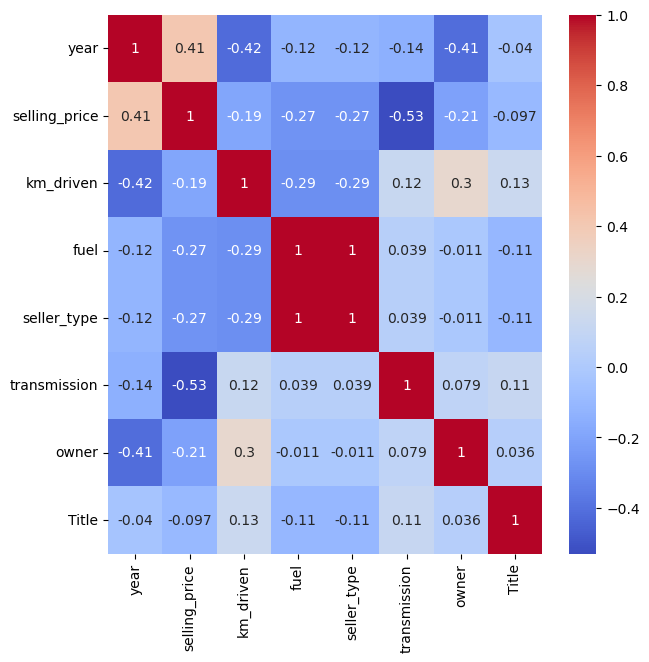

In [238]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In [239]:
print(num_cols)

Index(['year', 'selling_price', 'km_driven'], dtype='object')


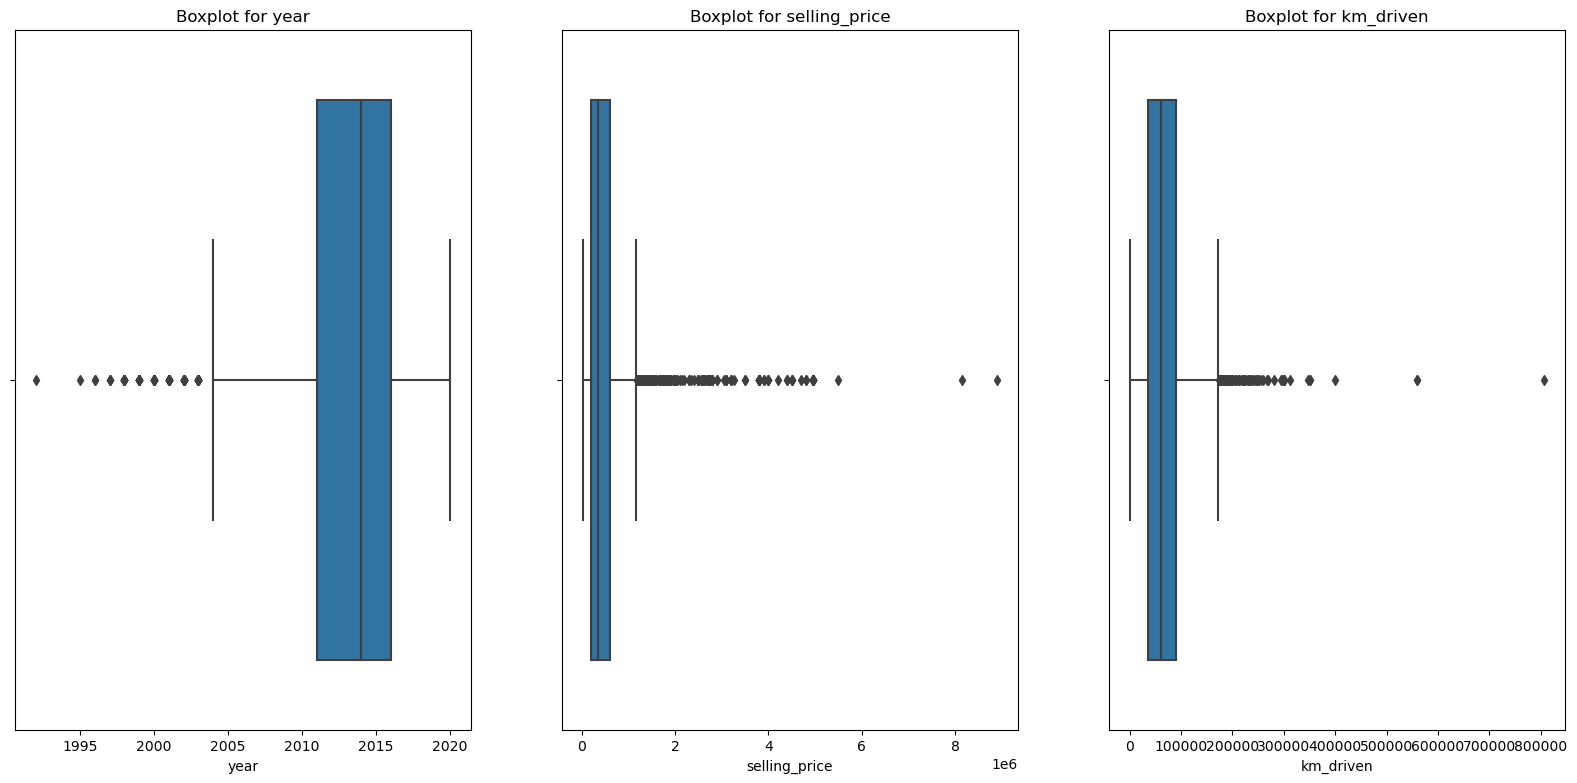

In [240]:
plt.figure(figsize=(20,20))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

In [241]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Title
0,2007,60000,70000,4,4,1,0,18
1,2007,135000,50000,4,4,1,0,18
2,2012,600000,100000,1,1,1,0,10
3,2017,250000,46000,4,4,1,0,5
4,2014,450000,141000,1,1,1,2,9


In [242]:
a=df[num_cols].describe(percentiles=[0.01,0.02,0.98,0.99]).T
a=a.iloc[:,3:]
a

,min,1%,2%,50%,98%,99%,max
year,1992.0,2001.00,2003.0,2014.0,2019.0,2020.0,2020.0
selling_price,20000.0,55000.00,65000.0,350000.0,2492200.0,3200000.0,8900000.0
km_driven,1.0,1444.68,5000.0,60000.0,186000.0,220000.0,806599.0


C:\Users\chand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\chand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\chand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\chand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will bec

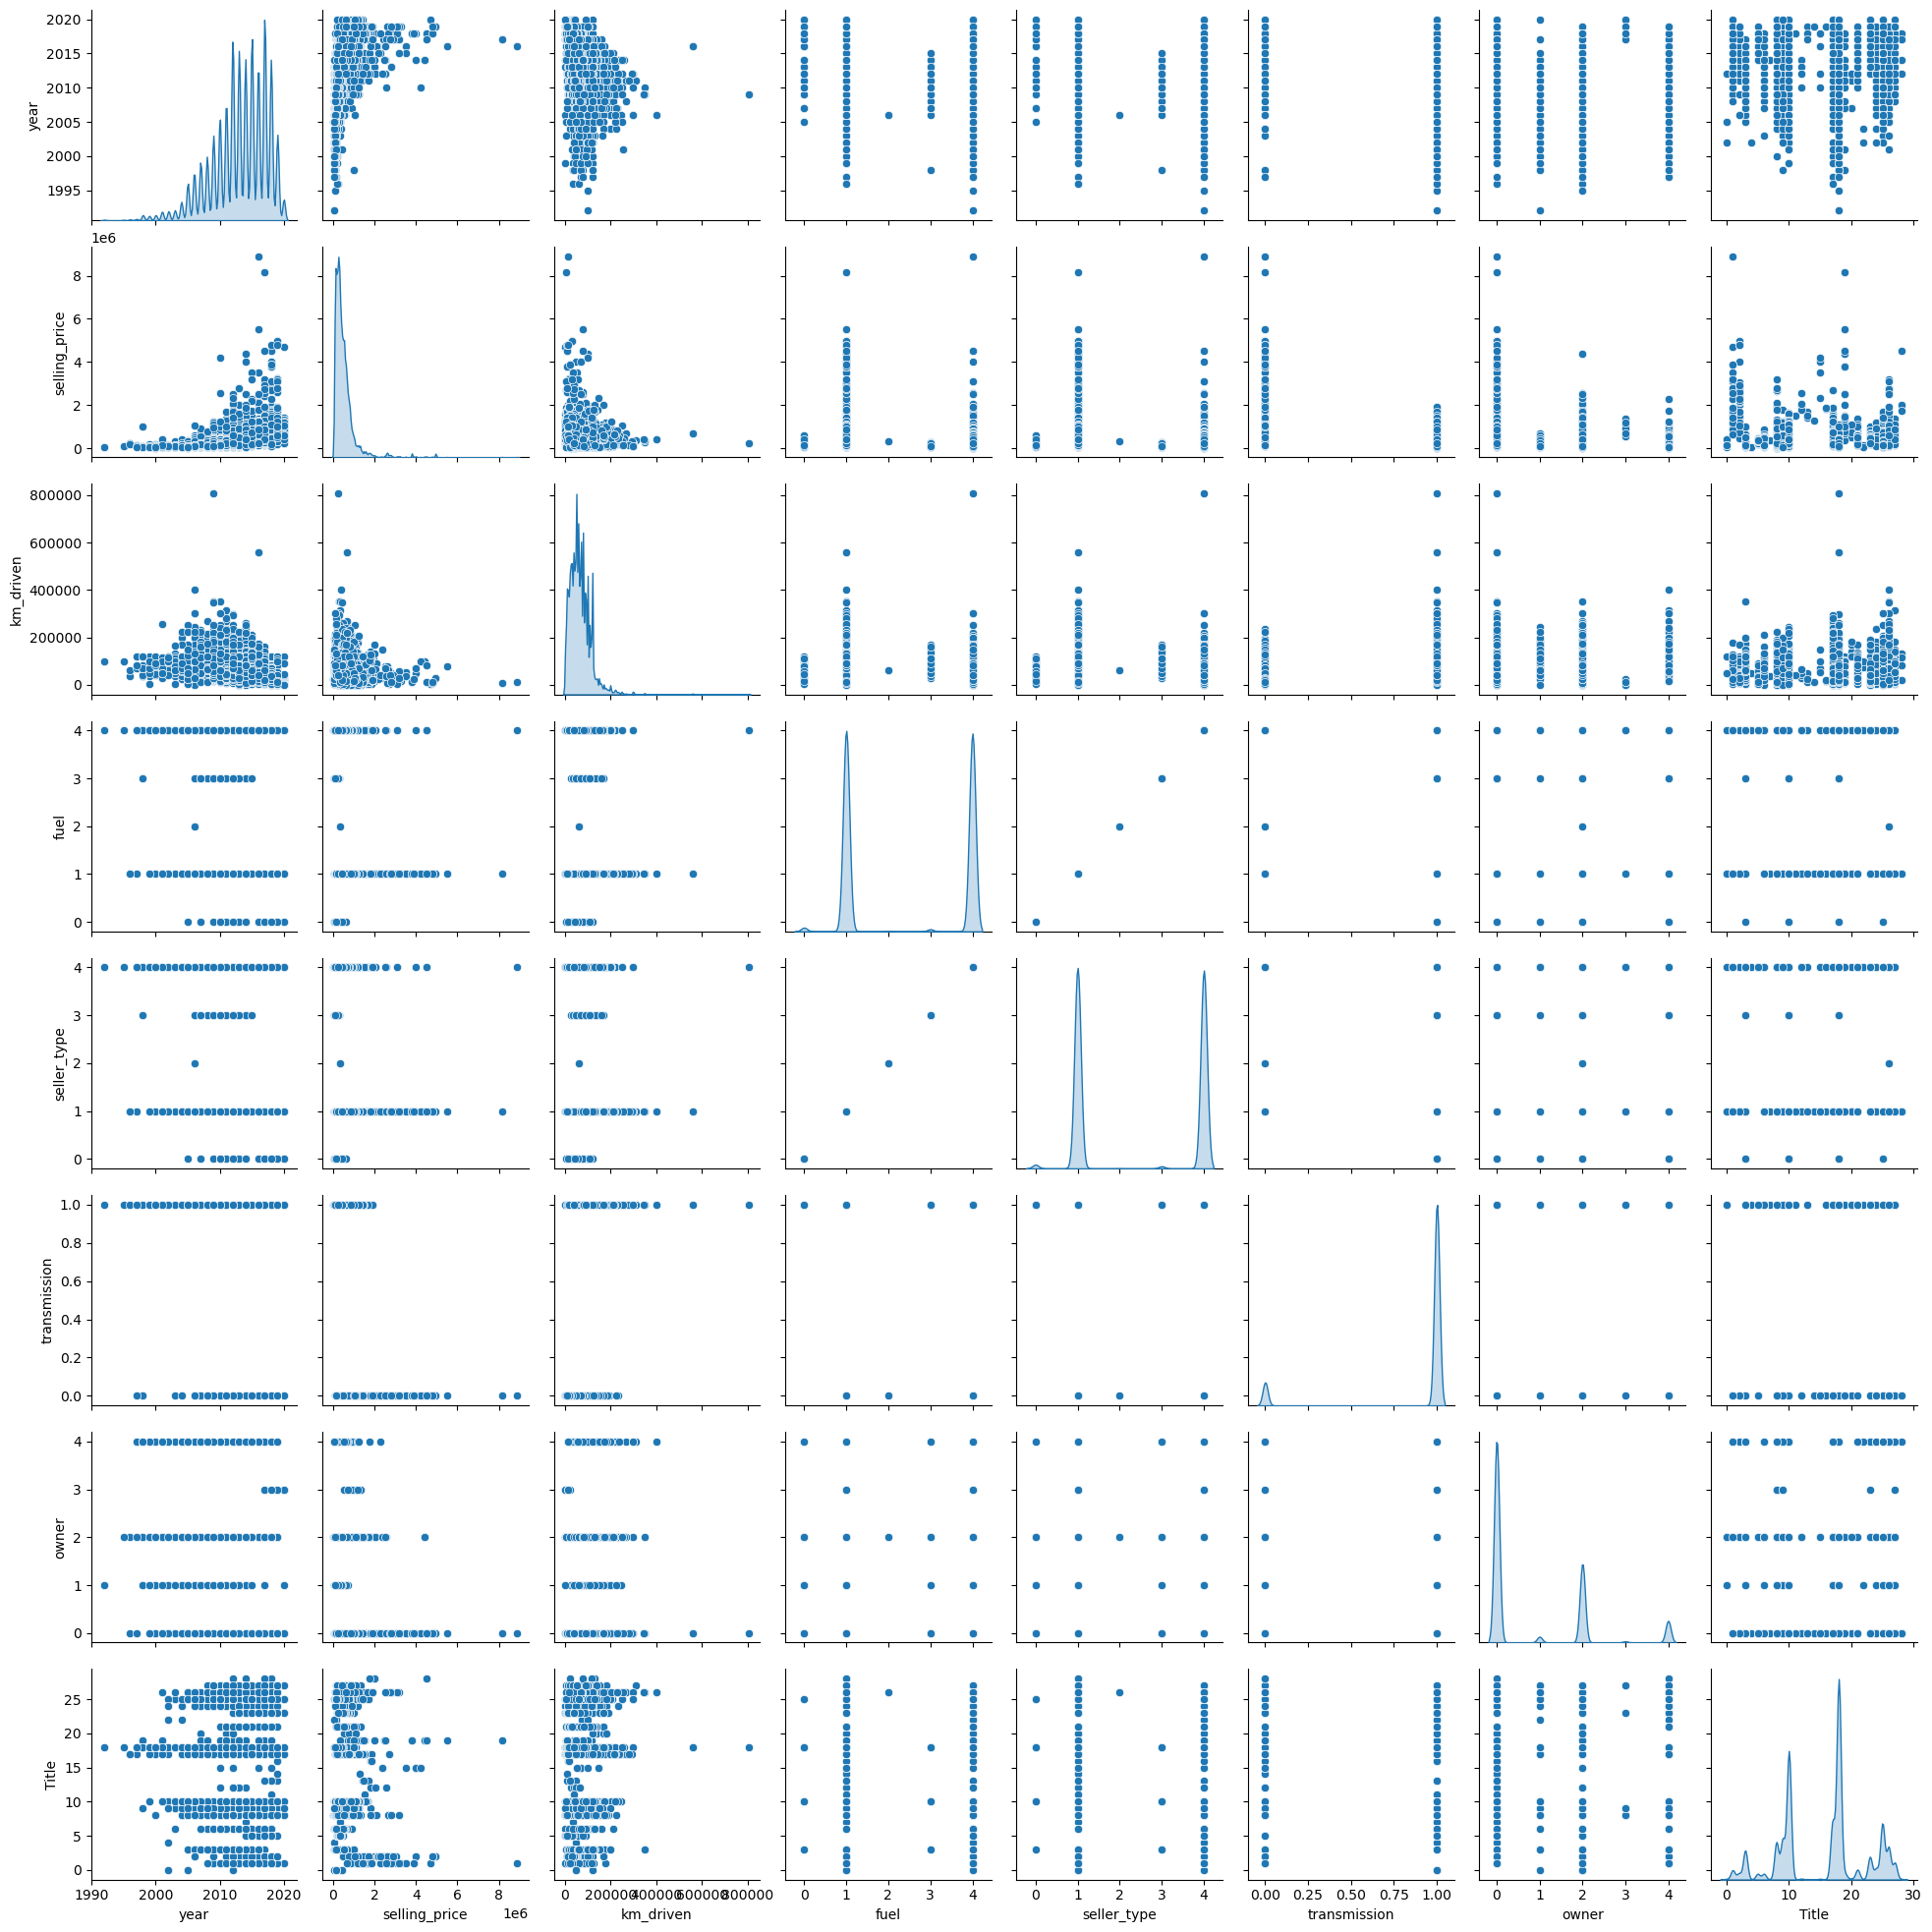

In [243]:
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

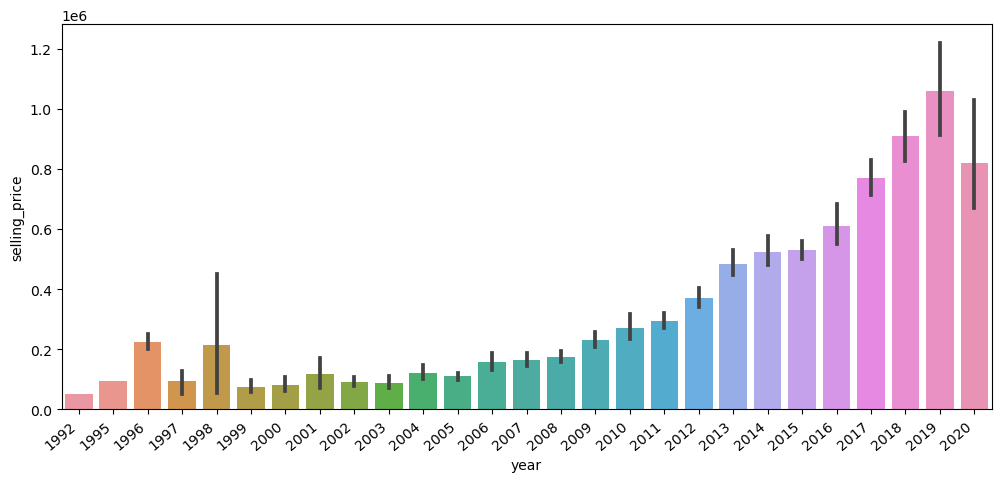

In [244]:
plt.subplots(figsize=(12,5))
ax=sns.barplot(x='year',y='selling_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\chand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


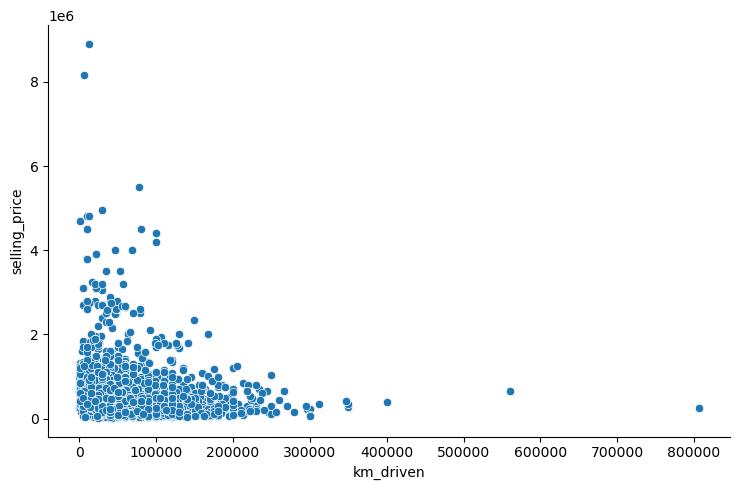

In [245]:
sns.relplot(x='km_driven',y='selling_price',data=df,height=5,aspect=1.5)

### Q5. Prepare the Data for Machine Learning modeling.

In [246]:
#### Select x and y

In [247]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']
print(x.shape)
print(y.shape)

(4340, 7)
(4340,)


In [248]:
from sklearn.model_selection import train_test_split

In [249]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3255, 7)
(1085, 7)
(3255,)
(1085,)


In [250]:
#### Create a function to evaluate the model


In [251]:
from sklearn.metrics import *

In [252]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse,'Test_MAE':test_mae},
                       index=[mname])
    return res

### Q6. Apply various Machine Learning techniques such as Regression or
## classification ,Bagging, Ensemble techniques and find out the
## best model using various Machine Learning model evaluation
## metrics.

In [253]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [254]:
#### Model Building

In [255]:
#### 1) Lin Reg

In [256]:
lrr = LinearRegression()
lr_res = eval_model(lrr,x_train,y_train,x_test,y_test,'Lin_Reg')
lr_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg,0.45288,0.441043,1.661614e+11,407628.936841,243109.708422


In [257]:
#### 2) Ridge Regression

In [258]:
rid = Ridge(alpha=0.2)
rid_res = eval_model(rid,x_train,y_train,x_test,y_test,'Ridge')
rid_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Ridge,0.45288,0.441119,1.661386e+11,407600.975498,243092.540298


In [259]:
#### 3) Lasso

In [260]:
las = Lasso(alpha=12)
las_res = eval_model(las,x_train,y_train,x_test,y_test,'Lasso')
las_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lasso,0.45288,0.44106,1.661564e+11,407622.809329,243103.367609


In [261]:
#### 4) DT Reg

In [262]:
dtt = DecisionTreeRegressor(max_depth=5,min_samples_split=10)
dt_res = eval_model(dtt,x_train,y_train,x_test,y_test,'DT_Reg')
dt_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DT_Reg,0.707547,0.630358,1.098837e+11,331487.049563,174391.520505


In [263]:
#### 5) AdaBoost Reg

In [264]:
adab = AdaBoostRegressor(n_estimators=80,random_state=42)
adab_res = eval_model(adab,x_train,y_train,x_test,y_test,'Adab_Reg')
adab_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Adab_Reg,0.387403,0.169974,2.467421e+11,496731.383545,418824.248656


In [265]:
#### 6) RF Reg

In [266]:
rff = RandomForestRegressor(n_estimators=100,max_depth=4,min_samples_split=8)
rf_res = eval_model(rff,x_train,y_train,x_test,y_test,'RF_Reg')
rf_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg,0.713332,0.629607,1.101067e+11,331823.256882,183993.736723


In [267]:
#### 7) KNN Reg

In [268]:
knn = KNeighborsRegressor(n_neighbors=7)
knn_res = eval_model(knn,x_train,y_train,x_test,y_test,'KNN_Reg')
knn_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
KNN_Reg,0.539568,0.339938,1.962169e+11,442963.759048,229906.792495


In [269]:
#### Tabulate All Results

In [270]:
res = pd.concat([lr_res,rid_res,las_res, dt_res,adab_res,rf_res,knn_res])
res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg,0.452880,0.441043,1.661614e+11,407628.936841,243109.708422
Ridge,0.452880,0.441119,1.661386e+11,407600.975498,243092.540298
Lasso,0.452880,0.441060,1.661564e+11,407622.809329,243103.367609
DT_Reg,0.707547,0.630358,1.098837e+11,331487.049563,174391.520505
Adab_Reg,0.387403,0.169974,2.467421e+11,496731.383545,418824.248656
RF_Reg,0.713332,0.629607,1.101067e+11,331823.256882,183993.736723
KNN_Reg,0.539568,0.339938,1.962169e+11,442963.759048,229906.792495


### Q7. Save the best model and Load the model.

#### Save the model

In [271]:
res = pd.concat([lr_res,rid_res,las_res, dt_res,adab_res,rf_res,knn_res])
res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg,0.452880,0.441043,1.661614e+11,407628.936841,243109.708422
Ridge,0.452880,0.441119,1.661386e+11,407600.975498,243092.540298
Lasso,0.452880,0.441060,1.661564e+11,407622.809329,243103.367609
DT_Reg,0.707547,0.630358,1.098837e+11,331487.049563,174391.520505
Adab_Reg,0.387403,0.169974,2.467421e+11,496731.383545,418824.248656
RF_Reg,0.713332,0.629607,1.101067e+11,331823.256882,183993.736723
KNN_Reg,0.539568,0.339938,1.962169e+11,442963.759048,229906.792495


### On the basis of RMSE, Decision Tree is the best Algorithm

In [272]:
dtt.score(x_train,y_train)

0.7075469905766394

In [273]:
import pickle

In [274]:
pickle.dump(dtt,open('dtt_modell.pkl','wb'))


## Q8. Take the original data set and make another dataset by randomly
## picking 20 data points from the CAR DETAILS dataset and apply
## the saved model on the same Dataset and test the model.


In [275]:
with open('dtt_modell.pkl','rb') as file:
    pipeline =pickle.load(file)

In [276]:
sample=df.sample(20)
y_sample_true=sample['selling_price']
sample=sample.drop('selling_price',axis=1)

In [277]:
dtt.predict(sample)

array([ 127532.23598131,  354084.0529595 ,  354084.0529595 ,
        747987.62962963,  127532.23598131,  198722.46075085,
        747987.62962963,  747987.62962963, 2098891.89189189,
        354084.0529595 ,  929946.93939394,  127532.23598131,
        807354.10416667,  539380.91534392,  529605.37837838,
        539380.91534392,  234166.56989247,  529605.37837838,
        529605.37837838,  345730.5461165 ])